# Dimension reduction with GoT character predictions

Reduce character information to two dimensions and label by popularity

In [126]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as clr
import pandas as pd
import sklearn

# Other Imports
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Inline Plotting
import IPython.html.widgets
%matplotlib inline

In [127]:
# Load CSV file into Pandas DataFrame
df = pd.read_csv('data/character-predictions.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
S.No                 1946 non-null int64
actual               1946 non-null int64
pred                 1946 non-null int64
alive                1946 non-null float64
plod                 1946 non-null float64
name                 1946 non-null object
title                938 non-null object
male                 1946 non-null int64
culture              677 non-null object
dateOfBirth          433 non-null float64
DateoFdeath          444 non-null float64
mother               21 non-null object
father               26 non-null object
heir                 23 non-null object
house                1519 non-null object
spouse               276 non-null object
book1                1946 non-null int64
book2                1946 non-null int64
book3                1946 non-null int64
book4                1946 non-null int64
book5                1946 non-null int64
isAliveMother        21 non

In [128]:
# Drop Useless Columns
df.drop(['name','mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather','isAliveHeir', 'culture', 'age', 'dateOfBirth', 'DateoFdeath'], axis=1, inplace=True)

# Fill
df['title'].fillna('No title', inplace=True) # No Title
df['isAliveSpouse'].fillna(-1, inplace=True) # No spouse

# Drop incomplete rows
df.dropna(axis=0, inplace=True)

# Reindex
df.reset_index(drop=True, inplace=True)

In [129]:
# Encode Houses and Titles into integers
le_house = preprocessing.LabelEncoder()
le_title = preprocessing.LabelEncoder()
df['house'] = le_house.fit_transform(list(df['house']))
df['title'] = le_title.fit_transform(list(df['title']))

## Group by Popularity

In [130]:
# Reorder columns so popularity is last
df = pd.concat([df.ix[:,:-2], df.ix[:,-1:], df.ix[:,-2]], axis=1)

In [131]:
# Split Data into X and Y vectors, where Y is popularity
y = df.ix[:,-1].values
x = df.ix[:,:-1].values

# Standardize features by removing the mean and scaling to unit variance
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [132]:
# t-distributed Stochastic Neighbor Embedding (t-SNE)
# Compress X vector to two dimensions
tsne = TSNE(n_components=2, random_state=0)
x_2d = tsne.fit_transform(x_std) 

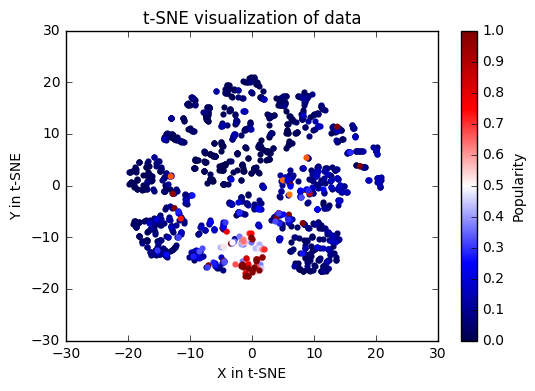

In [133]:
# Scatter Plot
plt.figure()

# Create continous color map for the 0-1 popularity
cmap = cm.seismic

# Fill Scatter Plot
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x_2d[y==cl,0], y=x_2d[y==cl,1], c=cmap(cl), marker='o', label=cl, lw=0)

# Labels and Legend
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.title('t-SNE visualization of data')

normalize = clr.Normalize(vmin=y.min(), vmax=y.max())
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
scalarmappaple.set_array(y)
plt.colorbar(scalarmappaple, label='Popularity')

plt.show()

## Conclusion

The scatter plot shows us that characters with similar popularity have similar data values. The data is clearly a good indicator of the popularity of a character.